In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('youtubers_df.csv')

## 1. Data Exploration

In [4]:
df.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [5]:
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [7]:
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [8]:
df['Categories'] = df['Categories'].fillna(value='Not Available')

In [9]:
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [10]:
len(df['Username'].unique())

994

In [11]:
len(df['Username'])

1000

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [13]:
def find_duplicates(data):
    seen = set()
    duplicates = set()

    for username in data:
        if username in seen:
            duplicates.add(username)
        seen.add(username)

    return duplicates

duplicates = find_duplicates(df['Username'])

In [14]:
duplicates

{'Family-Box',
 'HiTechIslamic',
 'NickyJamTV',
 'Super_Senya_RU',
 'mgcplayhouse',
 'thexoteam'}

In [15]:
usernames = ['Family-Box', 'HiTechIslamic', 'NickyJamTV', 'Super_Senya_RU', 'mgcplayhouse', 'thexoteam']
filtered_df = df[df['Username'].isin(usernames)]

In [16]:
filtered_df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
249,250,NickyJamTV,"Música y baile, Películas",23700000.0,Colombia,15800.0,1200.0,58.0,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
250,251,NickyJamTV,"Música y baile, Películas",23700000.0,Colombia,15800.0,1200.0,58.0,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
447,448,mgcplayhouse,"Juguetes, Coches y vehículos",17800000.0,Unknown,56300.0,96.0,0.0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
449,450,thexoteam,Not Available,17800000.0,Estados Unidos,797600.0,50400.0,179.0,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
450,451,thexoteam,Not Available,17900000.0,Estados Unidos,772800.0,45000.0,185.0,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
451,452,mgcplayhouse,"Juguetes, Coches y vehículos",17800000.0,Unknown,63600.0,75.0,0.0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
946,947,Super_Senya_RU,"Animación, Juguetes",12100000.0,Unknown,47200.0,192.0,0.0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...
947,948,HiTechIslamic,Música y baile,12100000.0,Pakistán,62200.0,810.0,59.0,http://youtube.com/channel/UCtKKyuORzErSd7TWfk...
949,950,Family-Box,Películas,12000000.0,Rusia,173600.0,6600.0,105.0,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...
952,953,Super_Senya_RU,"Animación, Juguetes",12100000.0,Unknown,47200.0,192.0,0.0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...


In [17]:
df = df.drop(index=[250,447,449,946,947,950])

In [18]:
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Not Available,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Not Available,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Not Available,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Not Available,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [19]:
df.reset_index(drop=True, inplace=True)
df.Rank = df.index + 1

In [20]:
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Not Available,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
989,990,hamzymukbang,Not Available,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
990,991,Adaahqueen,Not Available,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
991,992,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
992,993,PenMultiplex,Not Available,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [21]:
df.duplicated().sum()

0

In [22]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

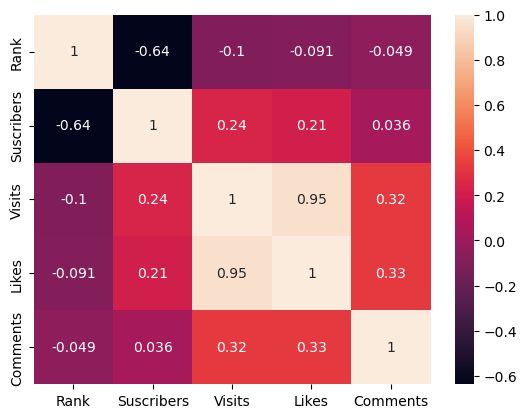

In [23]:
sns.heatmap(df.corr(), annot= True);

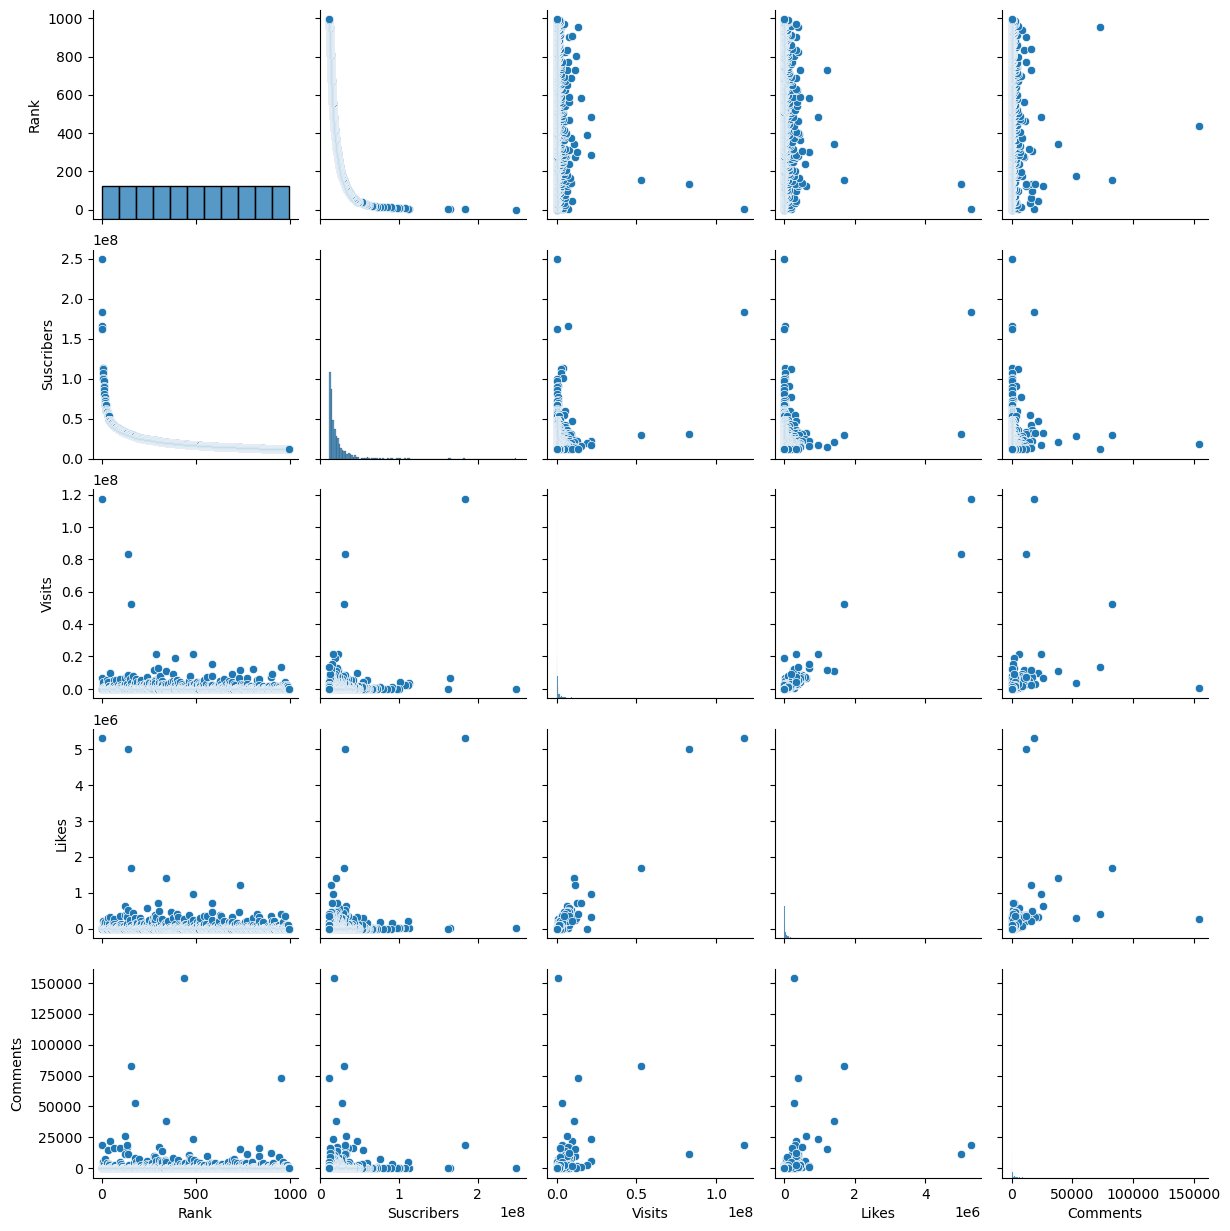

In [24]:
sns.pairplot(df)

## TREND ANALYSIS

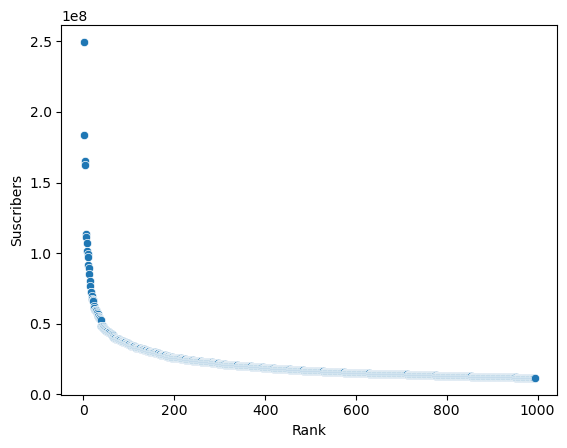

In [25]:
sns.scatterplot(data=df, x='Rank',y='Suscribers');

In [26]:
df['Categories'].unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación',
       'Not Available', 'Animación, Juguetes', 'Películas, Videojuegos',
       'Juguetes', 'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Anim

In [27]:
df['Categories'].value_counts()

Not Available                         305
Música y baile                        159
Películas, Animación                   60
Música y baile, Películas              40
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    28
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor             

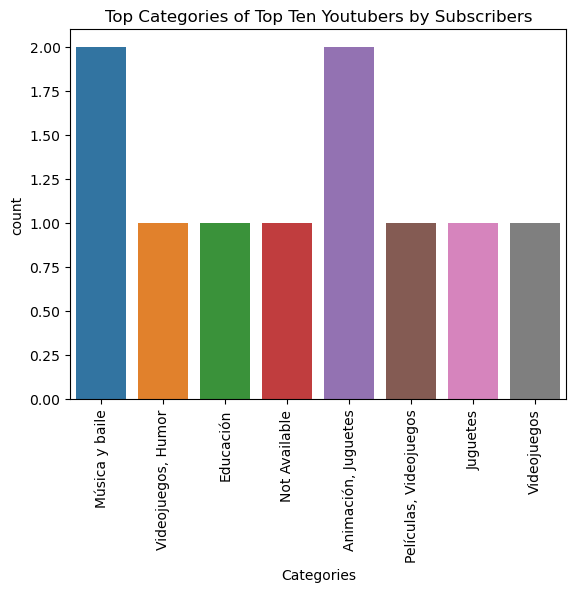

In [28]:
sns.countplot(data=df[:10], x='Categories')
plt.xticks(rotation=90)
plt.title('Top Categories of Top Ten Youtubers by Subscribers');

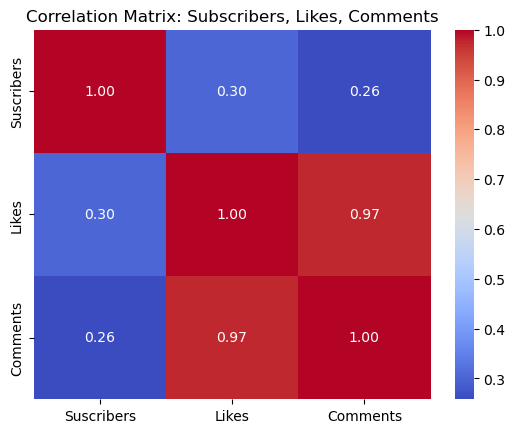

In [29]:
correlation_data = df[:10][['Suscribers', 'Likes', 'Comments']]
correlation_matrix = correlation_data.corr()

# Visualize correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Subscribers, Likes, Comments')
plt.show()

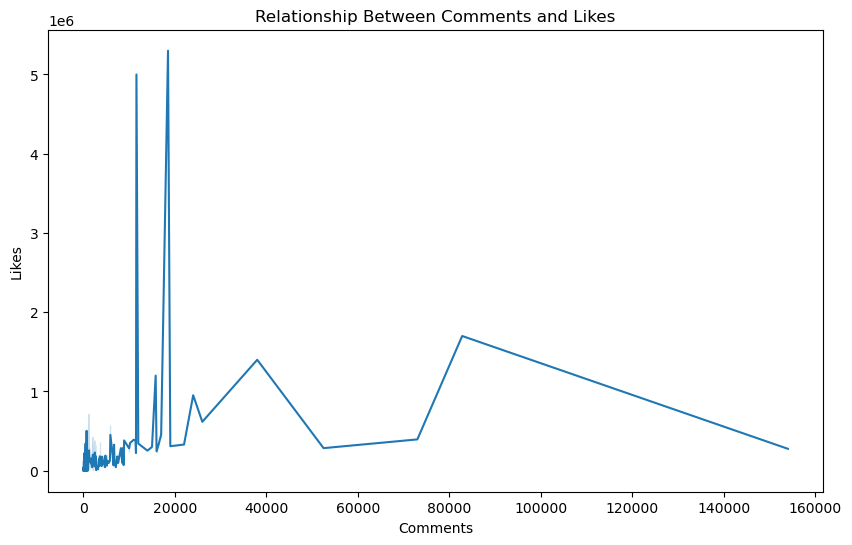

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Comments', y='Likes')
plt.title('Relationship Between Comments and Likes')
plt.xlabel('Comments')
plt.ylabel('Likes');

## AUDIENCE STUDY

In [31]:
df_grouped = df.groupby(['Country'])['Visits'].sum().reset_index()
df_visit = df_grouped.sort_values(by='Visits', ascending=False)

In [32]:
df_visit

,Country,Visits
10,Estados Unidos,617564460.0
13,India,263282855.5
28,Unknown,76446400.0
19,México,61966100.0
23,Rusia,42040300.0
4,Brasil,26820400.0
14,Indonesia,20344100.0
5,Colombia,14551000.0
2,Argentina,14474200.0
8,El Salvador,12900000.0


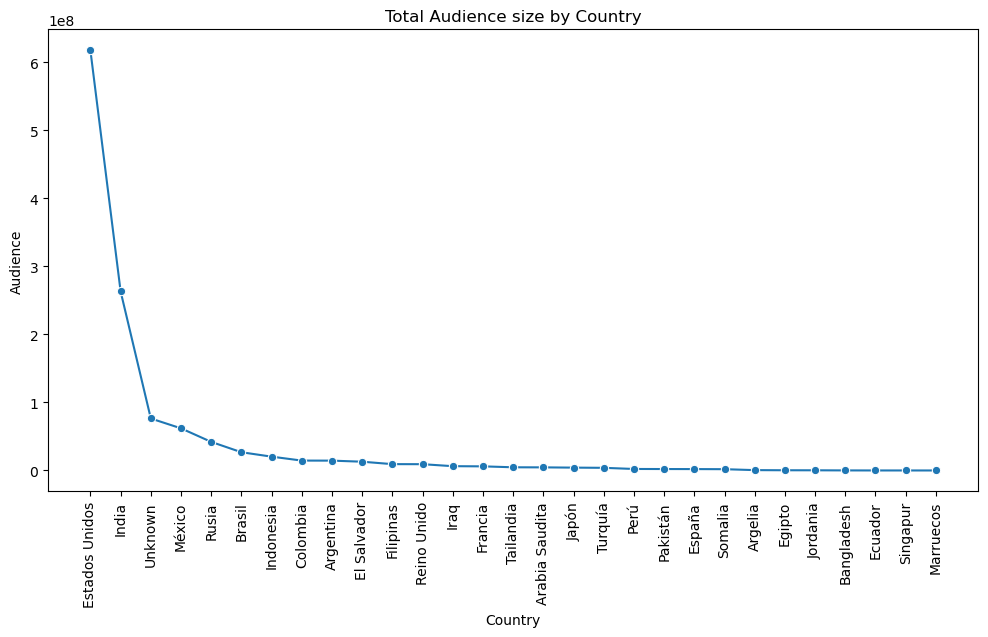

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_visit, x='Country', y='Visits', marker='o')
plt.xticks(rotation=90)
plt.title('Total Audience size by Country')
plt.xlabel('Country')
plt.ylabel('Audience');

In [34]:
grouped_data = df.groupby(['Country', 'Categories'])['Visits'].sum().reset_index()
grouped_data = grouped_data.sort_values(by='Visits',ascending= False)

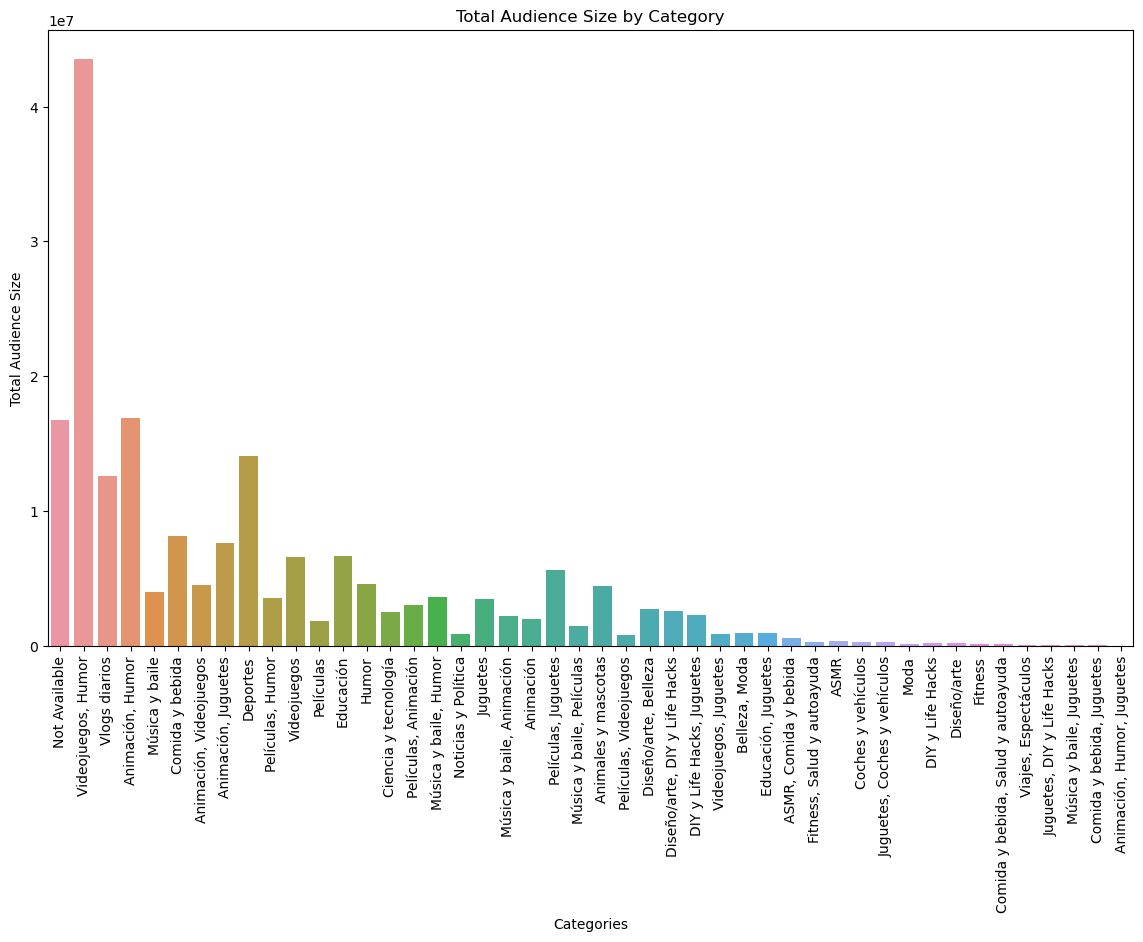

In [35]:
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='Categories', y='Visits', ci=None)
plt.title('Total Audience Size by Category')
plt.xlabel('Categories')
plt.ylabel('Total Audience Size')
plt.xticks(rotation=90)
plt.show()

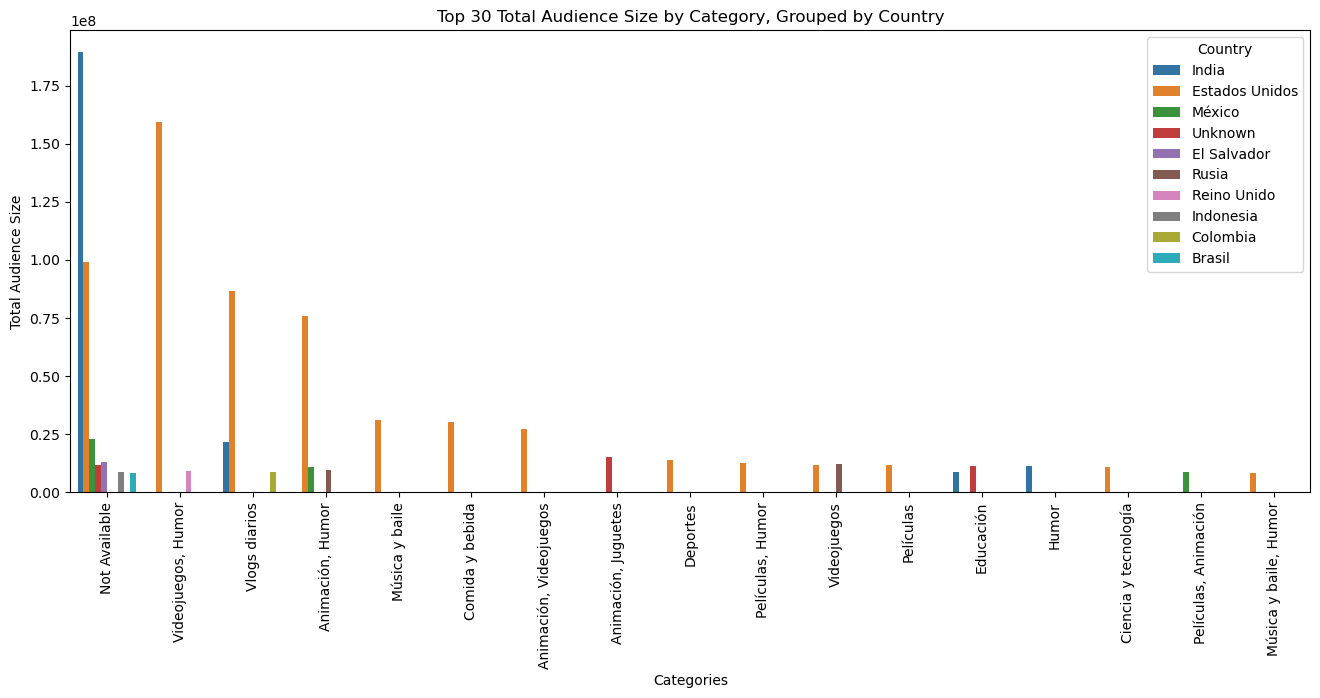

In [36]:
plt.figure(figsize=(16, 6))
sns.barplot(data=grouped_data[:30], x='Categories', y='Visits', hue='Country')
plt.title('Top 30 Total Audience Size by Category, Grouped by Country')
plt.xlabel('Categories')
plt.ylabel('Total Audience Size')
plt.xticks(rotation=90)
plt.legend(title='Country', loc='upper right');

## PERFORMANCE METRICS

In [37]:
average_subscribers = df['Suscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

# Print average metrics
print(f'Average Subscribers: {average_subscribers:.2f}')
print(f'Average Visits: {average_visits:.2f}')
print(f'Average Likes: {average_likes:.2f}')
print(f'Average Comments: {average_comments:.2f}')

Average Subscribers: 21930382.29
Average Visits: 1215573.46
Average Likes: 53896.37
Average Comments: 1295.80


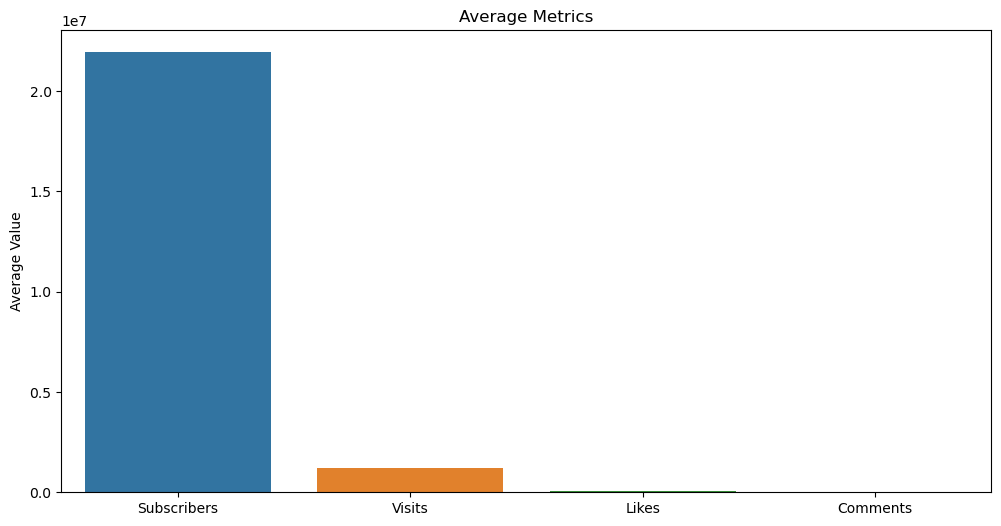

In [38]:
# Visualize average metrics
plt.figure(figsize=(12, 6))
sns.barplot(x=['Subscribers', 'Visits', 'Likes', 'Comments'],
            y=[average_subscribers, average_visits, average_likes, average_comments])
plt.title('Average Metrics')
plt.ylabel('Average Value');

<Figure size 1400x800 with 0 Axes>

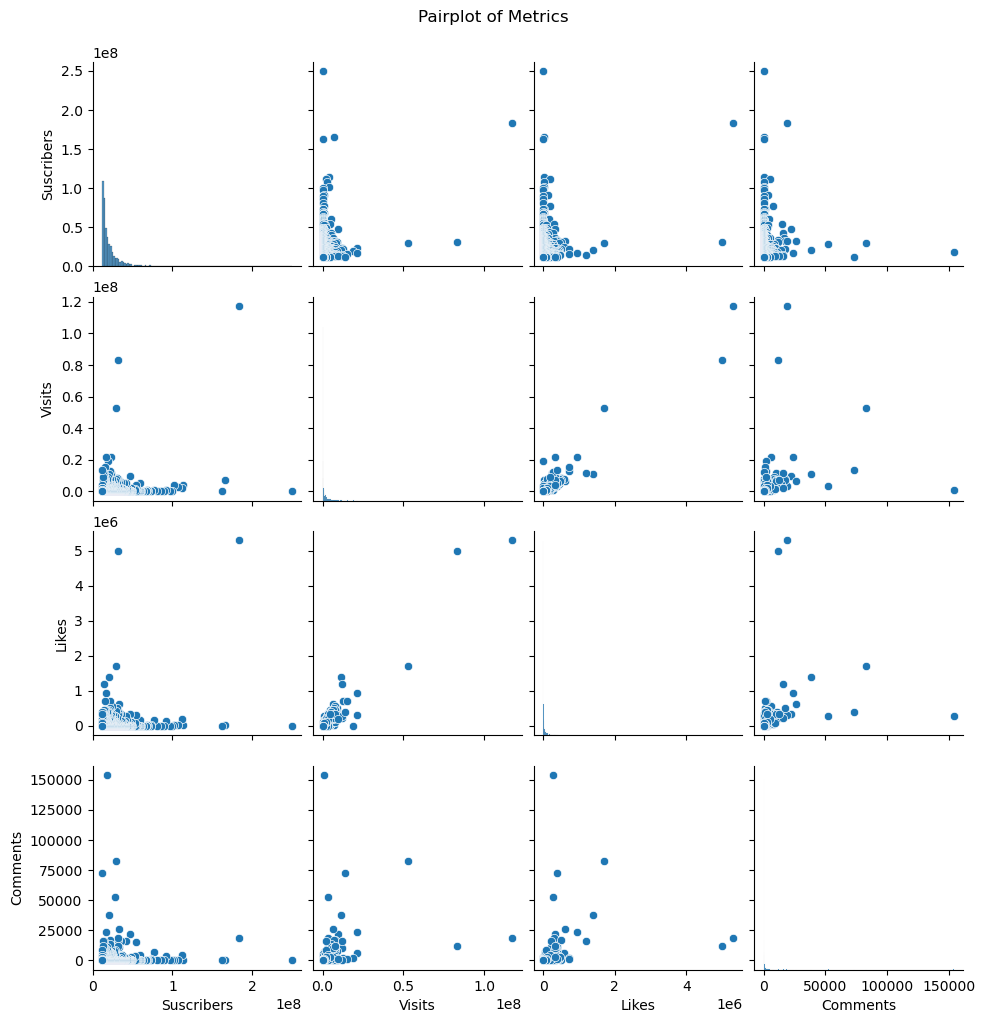

In [39]:
# Identify patterns or anomalies
plt.figure(figsize=(14, 8))
sns.pairplot(df[['Suscribers', 'Visits', 'Likes', 'Comments']])
plt.suptitle('Pairplot of Metrics', y=1.02)
plt.show();

### from the above we can see some patterns for example; subscribers vs likes, also, outliers are visible

## CONTENT CATEGORIES

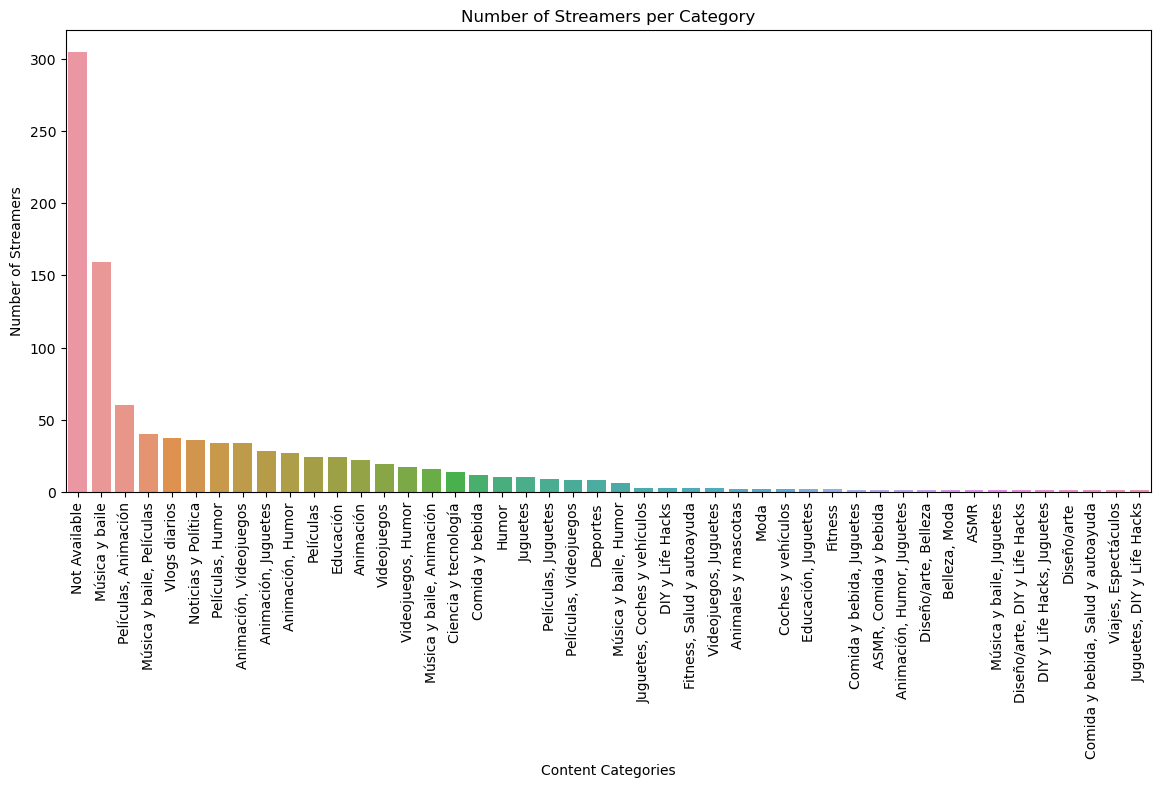

In [40]:
# Explore Content Categories
unique_categories = df['Categories'].unique()

# Count Streamers per Category
streamers_per_category = df['Categories'].value_counts()

# Visualize Streamers per Category
plt.figure(figsize=(14, 6))
sns.barplot(x=streamers_per_category.index, y=streamers_per_category.values)
plt.title('Number of Streamers per Category')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90);

In [41]:
average_metrics_per_category = df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Identify Categories with Exceptional Performance (e.g., high average likes)
categories_with_high_likes = average_metrics_per_category[average_metrics_per_category['Likes'] > average_metrics_per_category['Likes'].mean()]

In [42]:
categories_with_high_likes

,Suscribers,Visits,Likes,Comments
Categories,,,,
"Animación, Humor",2.078519e+07,3.760126e+06,145768.333333,5344.962963
"Animación, Videojuegos",1.939412e+07,1.200059e+06,79294.029412,3786.617647
Animales y mascotas,1.560000e+07,2.231450e+06,102750.000000,2806.000000
"Belleza, Moda",2.390000e+07,9.645000e+05,62300.000000,1100.000000
Ciencia y tecnología,1.726429e+07,8.871286e+05,59283.142857,1363.571429
Comida y bebida,1.612500e+07,2.722450e+06,128664.750000,3053.416667
"Diseño/arte, Belleza",1.440000e+07,2.700000e+06,152400.000000,1100.000000
"Diseño/arte, DIY y Life Hacks",2.570000e+07,2.600000e+06,127300.000000,2200.000000
Humor,1.525000e+07,2.310400e+06,169990.000000,5159.800000


In [43]:
categories_with_high_likes = categories_with_high_likes.sort_values(by='Likes',ascending=False)

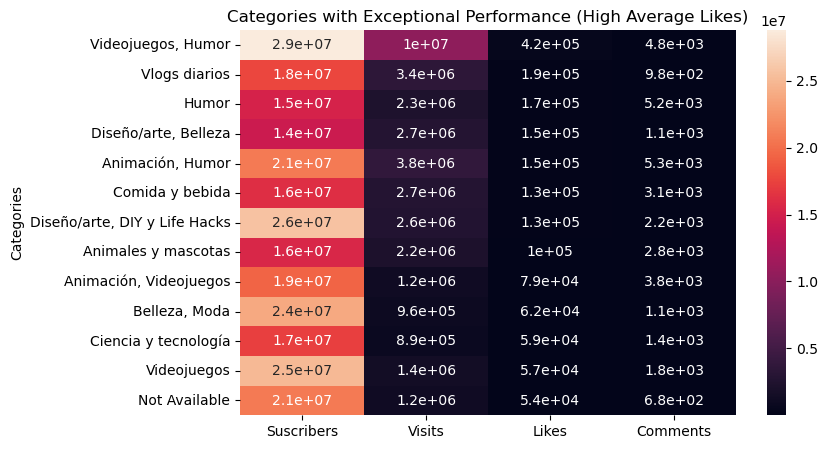

In [44]:
plt.figure(figsize=(8,5))
sns.heatmap(categories_with_high_likes,annot=True)
plt.title("Categories with Exceptional Performance (High Average Likes)");

## BRANDS & COLLABORATION
###  Higher engagement is an indication that the content may attract more attention, which could potentially lead to brand collaborations.

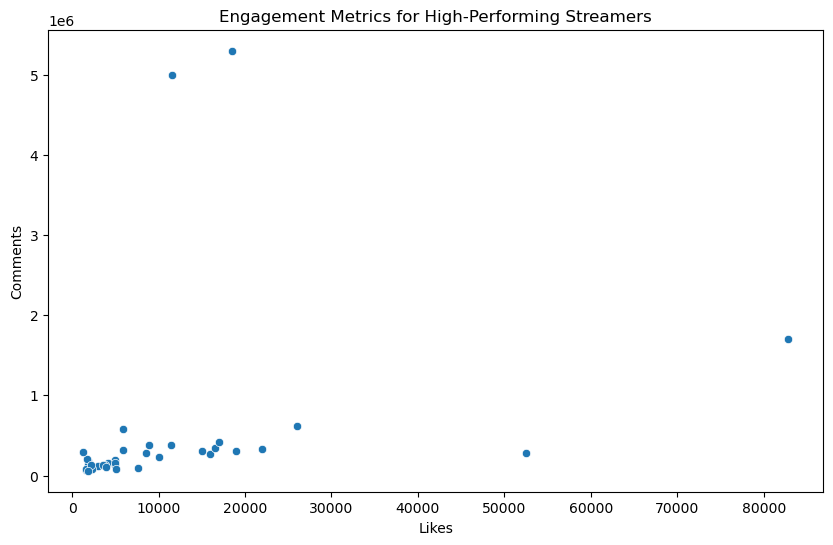

In [45]:
import warnings
from warnings import simplefilter

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


average_metrics_per_streamer = df.groupby('Username')['Suscribers', 'Visits', 'Likes', 'Comments'].mean()

# Identify streamers with high performance metrics
high_performing_streamers = average_metrics_per_streamer[
    (average_metrics_per_streamer['Suscribers'] > average_subscribers) &
    (average_metrics_per_streamer['Likes'] > average_likes) &
    (average_metrics_per_streamer['Visits'] > average_visits) &
    (average_metrics_per_streamer['Comments'] > average_comments)
]

# Analyze Engagement Metrics for High-Performing Streamers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Comments', y='Likes', data=df[df['Username'].isin(high_performing_streamers.index)])
plt.title('Engagement Metrics for High-Performing Streamers')
plt.xlabel('Likes')
plt.ylabel('Comments');

## 7. BENCHMARKING

In [46]:
print("Top-Performing Streamers:")
high_performing_streamers

Top-Performing Streamers:


,Suscribers,Visits,Likes,Comments
Username,,,,
A4a4a4a4,47300000.0,9700000.0,330400.0,22000.0
AboFlah,32700000.0,3300000.0,382000.0,11400.0
AlejoIgoa,25700000.0,5700000.0,208400.0,1700.0
AmiRodrigueZZ,22900000.0,4300000.0,294400.0,1300.0
CrazyXYZ,27800000.0,4200000.0,284100.0,8600.0
DaFuqBoom,29800000.0,52700000.0,1700000.0,82800.0
DanTDM,27800000.0,3500000.0,285000.0,52500.0
DrossRotzank,23100000.0,1700000.0,105900.0,3900.0
JessNoLimit,39600000.0,1300000.0,73500.0,1600.0


In [47]:
num=0
print('The Top 10 Top-performing content creators are:')
for name in (high_performing_streamers.index[:10]):
    num+=1
    print(num,name)

The Top 10 Top-performing content creators are:
1 A4a4a4a4
2 AboFlah
3 AlejoIgoa
4 AmiRodrigueZZ
5 CrazyXYZ
6 DaFuqBoom
7 DanTDM
8 DrossRotzank
9 JessNoLimit
10 JuegaGerman


 ### RECOMMENDATIONS / SUMMARY

 # 1. DATA CLEANING AND EXPLORATION # This process  identified and handled missing values in the 'Categories' column.# It helped e deteed and remoed duplicate entries based on the 'Username' column# .
The dataset contains information on various YouTube channels, including their ranks, usernames, categories, subscriber counts, country, visit counts, likes, comments, and link
 # 2.sREND ANALYSISys# This step u've visualized trends such as subscriber count versus rank and identified some patterns and outli#  It alsoYou've explored the distribution of categories among the top ten YouTubers by subscri
 # 3. AUDIENCE STUDY:  # This step 
You've analyzed the total audience size by country, identifying the top countries with the most # It 
You've also investigated the total audience size by category and visualized the distribution across different co
 # 4. untries.
Performance# This step s:
You've calculated average metrics such as subscribers, visits, likes, and comments, providing insight into the overall performance of the# It also ls.
You've identified exceptional performance in specific content categories based on high ave
 # 5. CONTENT CATEGORIES: t# This step ries:
You've explored the distribution of streamers across different conten# It further t categories.
Identified categories with exceptional performance based on high 
 # 6. BRAND COLLABORATION AND ANALYSIS:  
# This nalysis:
You've examined engagement metrics for high-performing streamers, which could be valuable for potential brand
# 7. BENCHMARKING: n# This i.
Benchmarking:
Identified top-performing streamers based on various pe
#  8. ALL rISUALS: c# This isualizations:
Your notebook includes a variety of visualizations, such as bar plots, line plots, scatter plots, heatmaps, and pair plots, which effectively convey insights from the data.